<a href="https://colab.research.google.com/github/zainmo11/Boolean-Quantum-Circuit-Simulation/blob/main/Boolean_Quantum_Circuit_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  qiskit
!pip install qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ef07afed4072f4fdbfb362444af1b2577fd480f7588733132703ef60d9be2452
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from IPython.display import display, Markdown
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Boolean Quantum Circuit Simulation

In [3]:
sim = AerSimulator()

## NOT Gate

Input A=0 -> Output (NOT): {'1': 1024}


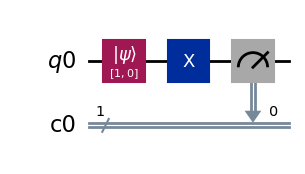

Input A=1 -> Output (NOT): {'0': 1024}


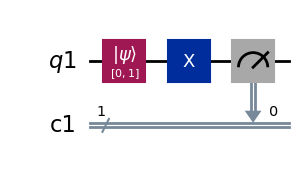

In [4]:
for a in [0, 1]:
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])
    qc.x(qr[0])  # NOT gate
    qc.measure(qr[0], cr[0])

    result = sim.run(qc, shots=1024).result()
    counts = result.get_counts()
    print(f"Input A={a} -> Output (NOT):", counts)

    display(qc.draw(output='mpl'))
    plot_histogram(counts)
    plt.show()

## XOR Gate

Input A=0, B=0 -> Output (XOR): {'0': 1024}


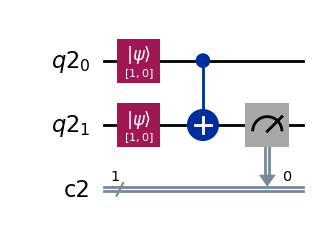

Input A=0, B=1 -> Output (XOR): {'1': 1024}


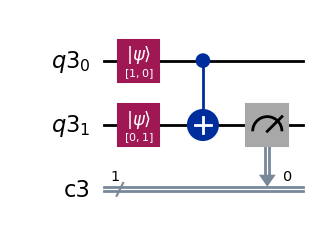

Input A=1, B=0 -> Output (XOR): {'1': 1024}


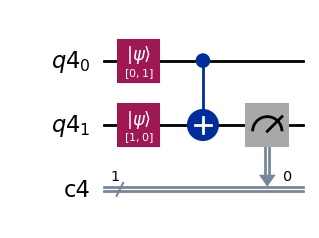

Input A=1, B=1 -> Output (XOR): {'0': 1024}


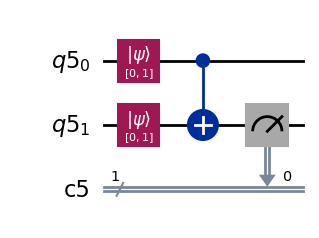

In [5]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(2)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # Input A
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # Input B

        qc.cx(qr[0], qr[1])  # XOR gate: qr[1] = A XOR B
        qc.measure(qr[1], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (XOR):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()

## AND Gate

Input A=0, B=0 -> Output (AND): {'0': 1024}


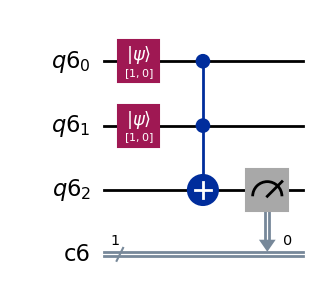

Input A=0, B=1 -> Output (AND): {'0': 1024}


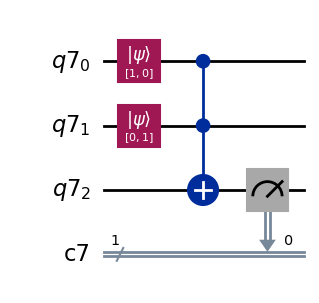

Input A=1, B=0 -> Output (AND): {'0': 1024}


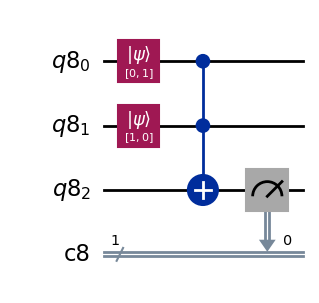

Input A=1, B=1 -> Output (AND): {'1': 1024}


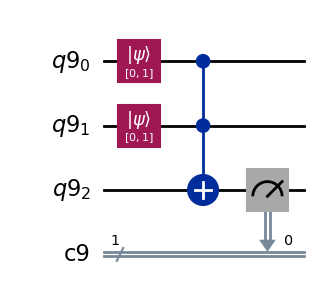

In [6]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(3)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # Input A
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # Input B

        qc.ccx(qr[0], qr[1], qr[2])  # AND: result in qr[2]
        qc.measure(qr[2], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (AND):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()

## OR Gate

Input A=0, B=0 -> Output (OR): {'0': 1024}


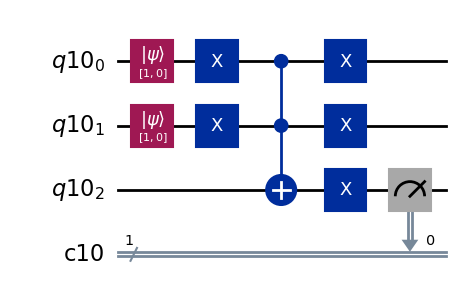

Input A=0, B=1 -> Output (OR): {'1': 1024}


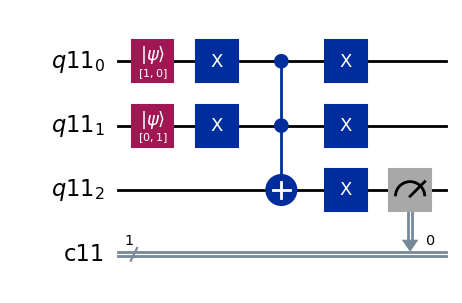

Input A=1, B=0 -> Output (OR): {'1': 1024}


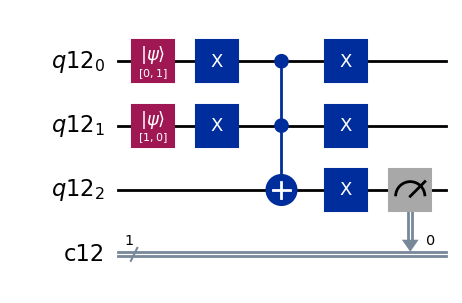

Input A=1, B=1 -> Output (OR): {'1': 1024}


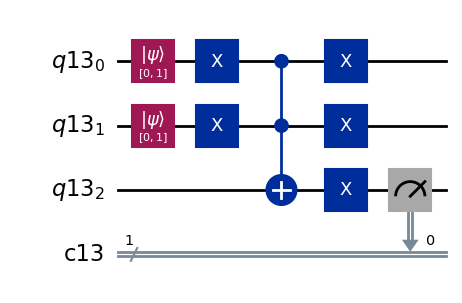

In [7]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(3)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0]) # sets qubit to |0⟩
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1]) # sets qubit to |1⟩

        qc.x(qr[0])
        qc.x(qr[1])
        qc.ccx(qr[0], qr[1], qr[2])
        qc.x(qr[2])
        qc.x(qr[0])
        qc.x(qr[1])
        qc.measure(qr[2], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (OR):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()


## NAND Gate

Input A=0, B=0 -> Output (NAND): {'1': 1024}


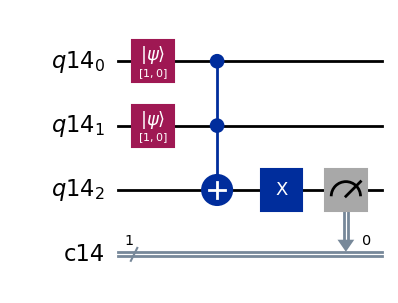

Input A=0, B=1 -> Output (NAND): {'1': 1024}


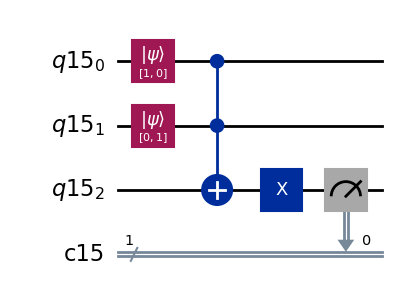

Input A=1, B=0 -> Output (NAND): {'1': 1024}


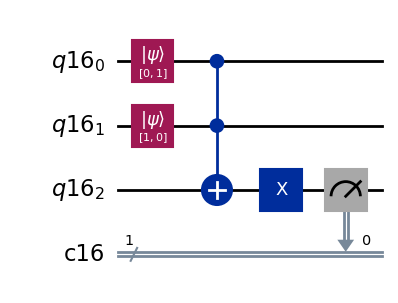

Input A=1, B=1 -> Output (NAND): {'0': 1024}


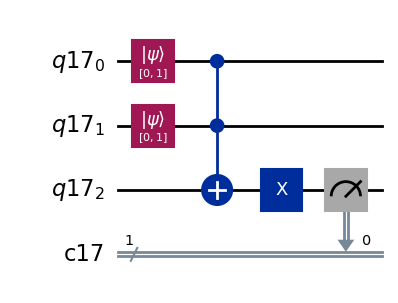

In [8]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(3)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # Input A
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # Input B

        qc.ccx(qr[0], qr[1], qr[2])  # AND gate
        qc.x(qr[2])                 # NOT the output -> NAND
        qc.measure(qr[2], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (NAND):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()

## NOR Gate

Input A=0, B=0 -> Output (NOR): {'1': 1024}


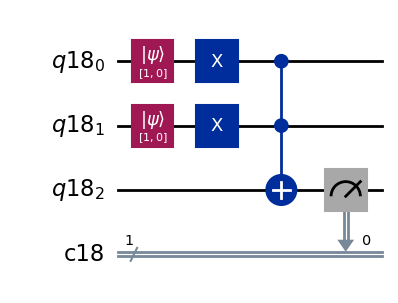

Input A=0, B=1 -> Output (NOR): {'0': 1024}


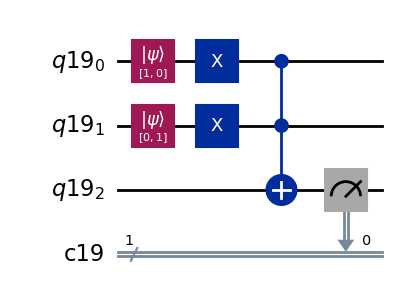

Input A=1, B=0 -> Output (NOR): {'0': 1024}


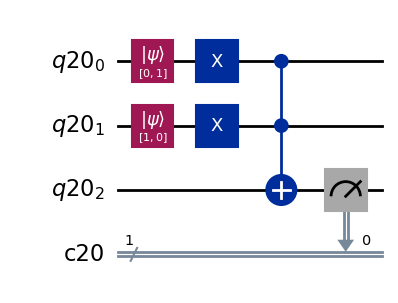

Input A=1, B=1 -> Output (NOR): {'0': 1024}


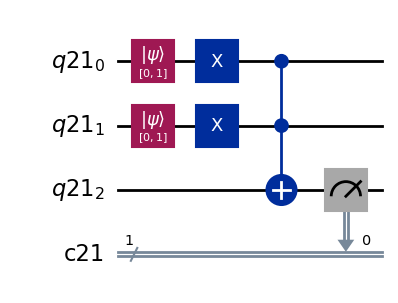

In [9]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(3)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # Input A
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # Input B

        qc.x(qr[0])
        qc.x(qr[1])
        qc.ccx(qr[0], qr[1], qr[2])  # NOR = NOT(A OR B)
        qc.measure(qr[2], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (NOR):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()

## FULL-ADDER

Inputs A=0, B=0, Cin=0 -> Output (Sum, Cout): {'00': 1024}


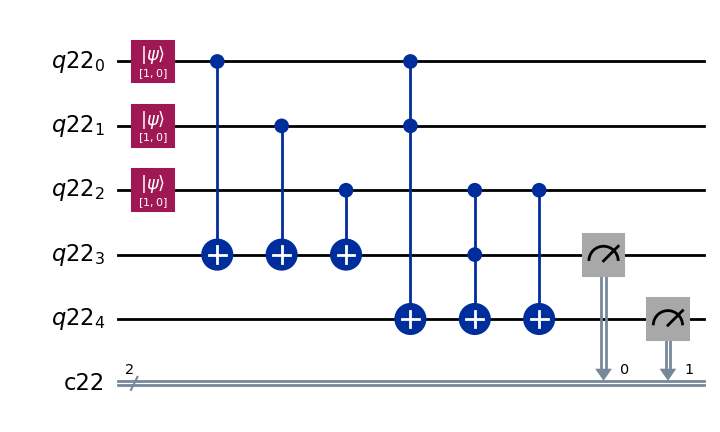

Inputs A=0, B=0, Cin=1 -> Output (Sum, Cout): {'01': 1024}


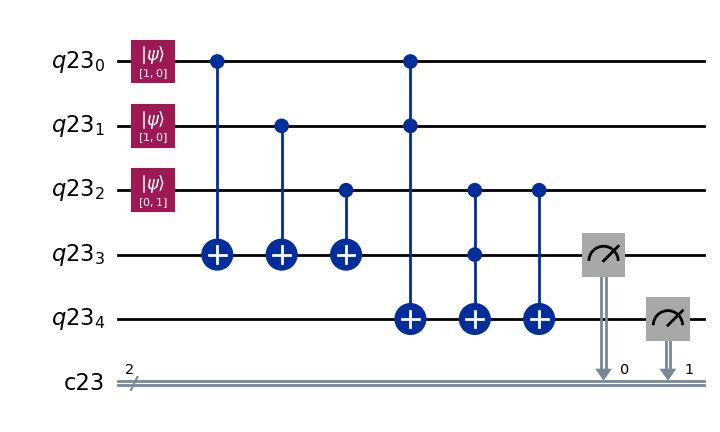

Inputs A=0, B=1, Cin=0 -> Output (Sum, Cout): {'01': 1024}


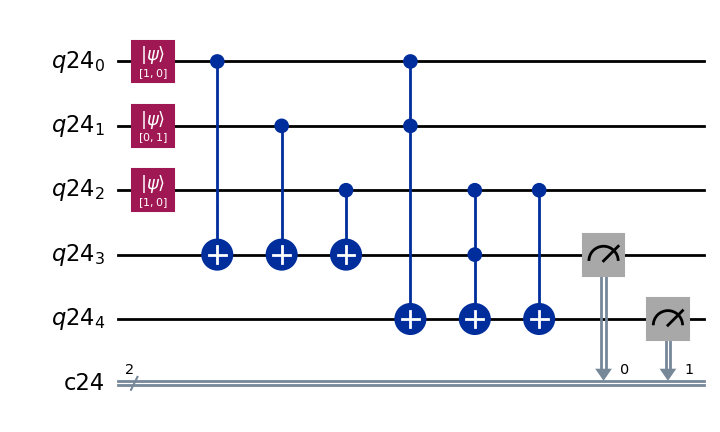

Inputs A=0, B=1, Cin=1 -> Output (Sum, Cout): {'10': 1024}


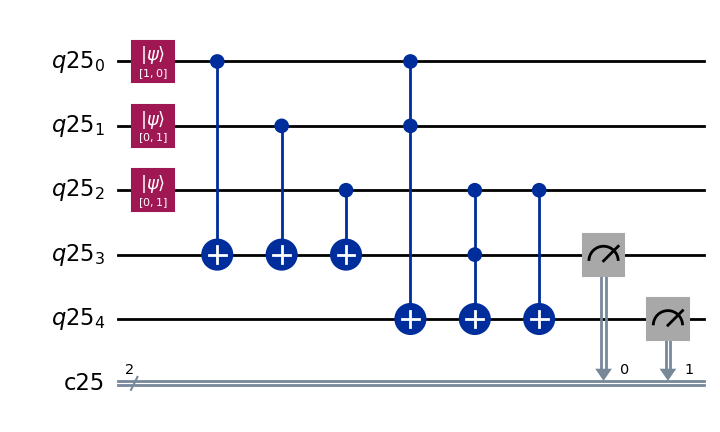

Inputs A=1, B=0, Cin=0 -> Output (Sum, Cout): {'01': 1024}


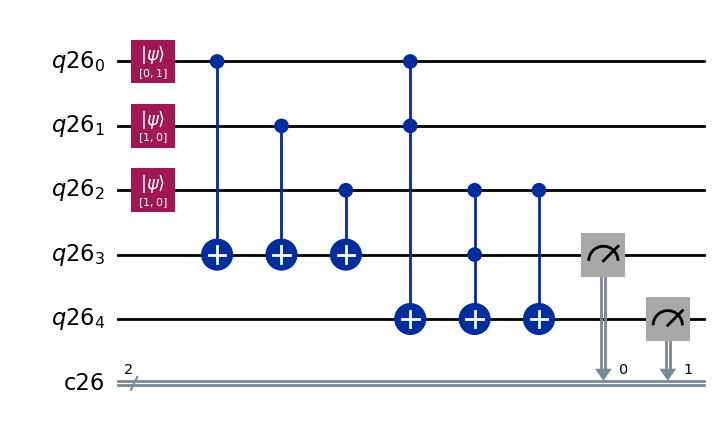

Inputs A=1, B=0, Cin=1 -> Output (Sum, Cout): {'10': 1024}


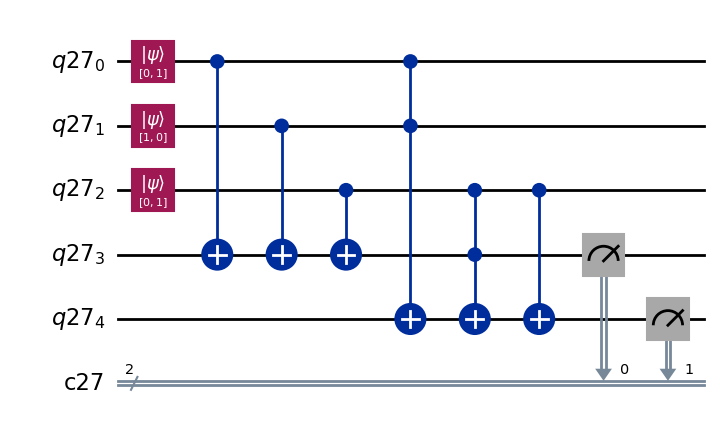

Inputs A=1, B=1, Cin=0 -> Output (Sum, Cout): {'10': 1024}


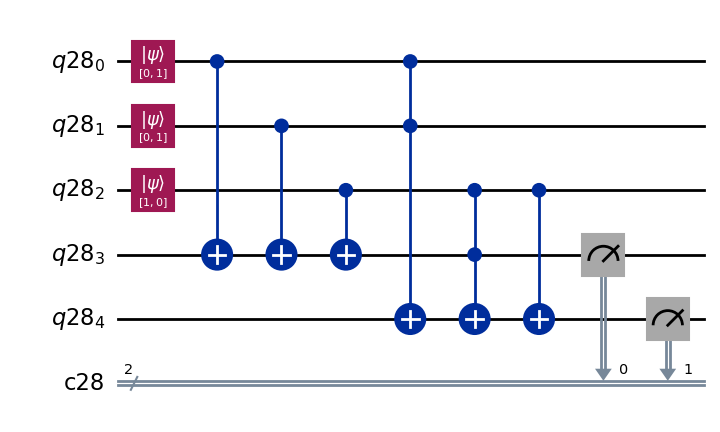

Inputs A=1, B=1, Cin=1 -> Output (Sum, Cout): {'11': 1024}


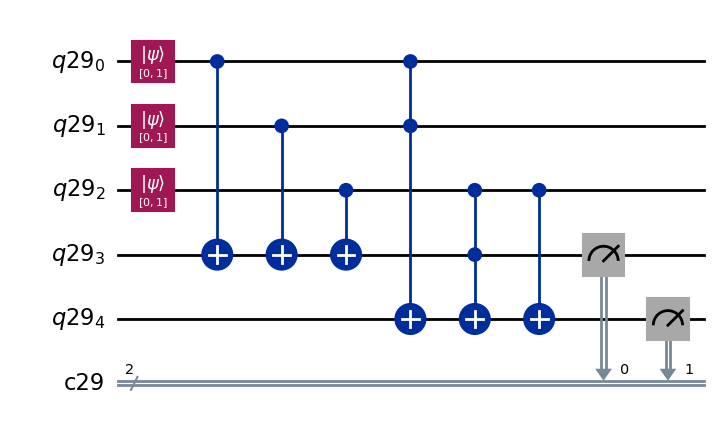

In [10]:
for a in [0, 1]:
    for b in [0, 1]:
        for cin in [0, 1]:
            qr = QuantumRegister(5)
            cr = ClassicalRegister(2)
            qc = QuantumCircuit(qr, cr)
            # q0=A, q1=B, q2=CarryIn, q3=Sum, q4=CarryOut

            # Initialize inputs
            qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # A
            qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # B
            qc.initialize([1, 0] if cin == 0 else [0, 1], qr[2])  # Cin

            # Sum = A ⊕ B ⊕ Cin
            qc.cx(qr[0], qr[3])
            qc.cx(qr[1], qr[3])
            qc.cx(qr[2], qr[3])

            # CarryOut logic
            qc.ccx(qr[0], qr[1], qr[4])
            qc.ccx(qr[2], qr[3], qr[4])
            qc.cx(qr[2], qr[4])

            # Measure
            qc.measure(qr[3], cr[0])  # Sum bit
            qc.measure(qr[4], cr[1])  # Carry-out

            result = sim.run(qc, shots=1024).result()
            counts = result.get_counts()
            print(f"Inputs A={a}, B={b}, Cin={cin} -> Output (Sum, Cout):", counts)

            display(qc.draw(output='mpl'))
            plot_histogram(counts)
            plt.show()


## 1-BIT COMPARTOR

Input A=0, B=0 -> Output (A > B): {'0': 1024}


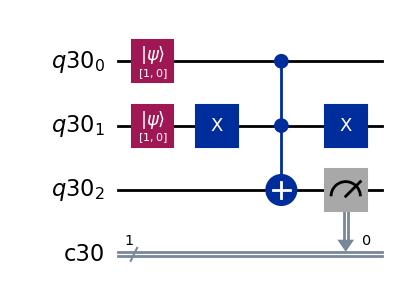

Input A=0, B=1 -> Output (A > B): {'0': 1024}


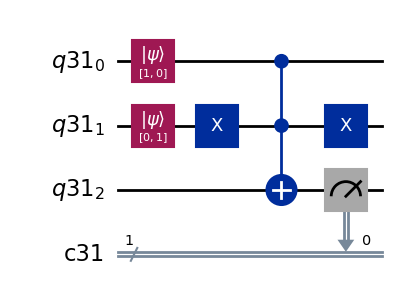

Input A=1, B=0 -> Output (A > B): {'1': 1024}


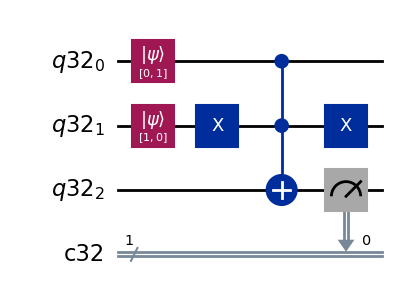

Input A=1, B=1 -> Output (A > B): {'0': 1024}


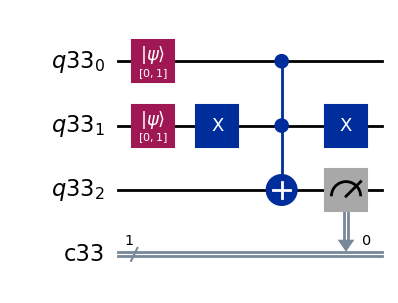

In [11]:
for a in [0, 1]:
    for b in [0, 1]:
        qr = QuantumRegister(3)  # q0=A, q1=B, q2=Output
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr, cr)

        # Initialize A and B
        qc.initialize([1, 0] if a == 0 else [0, 1], qr[0])  # A
        qc.initialize([1, 0] if b == 0 else [0, 1], qr[1])  # B

        # Comparator logic: A > B
        qc.x(qr[1])
        qc.ccx(qr[0], qr[1], qr[2])
        qc.x(qr[1])

        # Measure the result (A > B) in classical bit
        qc.measure(qr[2], cr[0])

        result = sim.run(qc, shots=1024).result()
        counts = result.get_counts()
        print(f"Input A={a}, B={b} -> Output (A > B):", counts)

        display(qc.draw(output='mpl'))
        plot_histogram(counts)
        plt.show()